# <center>Project: Beware Bunnies</center>

### Michael Salamon, Dor Ulman, Nahin Imtiaz, Asma Sadia

##### CSC 59866 Senior Design Project I - Applied Machine Learning
##### The City College of New York

---

### Introduction

-          What is the problem that you’re solving? Who are you solving it for?  

	The European Rabbit (Oryctolagus cuniculus) was translocated to Australia in the 1880’s as a food resource and for hunting activities. This species of rabbit spread rapidly across Australia and became a major issue for the locals. Because of its reproductive capacity, the rabbit community increased rapidly, invading and exploiting a diversity of green areas and disrupted the ecosystems in certain regions. Currently, the European rabbit is present in more than 70% of the Australian continent, surpassing the growth of the local vegetation and competing with local animals for food and habitants. The rabbits are also a source of food for predators which inflate their population and for these reasons the economy has 200 million loss for the Australian economy annually. Predicting the growth rate and regions of the invasive species will allow the Australian government to allocate means efficiently in order to regulate the European Rabbit population. Means of regulation include lacing rabbit food w/ viruses or sending specially trained dogs to certain areas. The model should be accurate enough for helping the Australian continent to send resources to areas with far too many rabbits to regulate the population to give time for vegetation/ecosystem to grow back.
    
    
-          What are potential features, whether already built or that you’ll need to make? What is your target variable?  

	Potential features(from abundance dataset): 
    RabbitsPerKm - number of rabbits observed per kilometre
    Season or Date(Day, Month, Year) - measurement of time.
    DistPermWater - Euclidean weighted distance to permanent water features(km)
    DistAgrilLand - Euclidean distance to agricultural land margins(km)
    Location - Longitude and latitude (maybe also state?)
	Target variables:
    Rabbit population prediction (per km)
    Location in which the growth happen


-          What transformations will you need to perform on your input data?  

    While looking at the datasets statistics (using .describe() on the data frame), some rows are missing data and will probably be removed. For example, in both datasets, columns ‘Month’ and ‘Day’ are missing values which are crucial for finding accurate trends of rabbit’s population growth over time. In addition, taking into consideration the accuracy of collected data, meaning filtering data that was not accurately collected - “QA_Accuracy” which is the ‘quality assessment of the data accuracy’.


-          What modeling approach(es) will you use for your problem? Is this classification or regression? 

    Regression  -  ML models that are ideal for forecasting for this project are: are LSTM and RNN.
    Another approach would be: Math approach - https://mathinsight.org/controlling_rabbit_population 


-          How will you evaluate your model’s performance? This should be in terms of quantitative metrics, qualitative evaluation, and visualizations.

    Comparison with math models.


In [76]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# 99% of the data in occurence takes place in the past 35 years. (Roy-Dufresne 6)
occurence = pd.read_csv('SI1_DataOccurrence.zip')
occurence

,Occurrence_ID,AustraliaUTMGrid10Km_ID,AustraliaUTMGrid10Km_Lat,AustraliaUTMGrid10Km_Long,ResolutionQuality,TotalNbOccurrencesPerUTMGrid,PtsIntensityEstimate_AllDataPerUTMGrid,PtsIntensityEstimate_OneDataPerUTMGrid,AustraliaState,DataType,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
0,1,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
1,2,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
2,3,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
3,4,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
4,5,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689260,689281,56K4693,-23.85,151.25,More_than_15km,1,0.01,0.21,SA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689261,689282,50H1833,-35.00,117.29,More_than_15km,3,0.00,0.14,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689262,689283,56H0842,-33.45,150.15,More_than_15km,25,0.11,0.74,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689263,689284,55H0350,-32.55,148.95,More_than_15km,3,0.16,0.80,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
abundance = pd.read_csv('SI2_DataAbundance.zip', low_memory=False)
abundance

,SpotData_ID,AustraliaUTMGrid10Km_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,ResolutionQuality,TotalNbTransectsPerUTMGrid,AustraliaState,StudyRegions_ID,DataSourceEntry_ID,DataSourceName,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
0,1,55H0894,149.35,-33.45,Less_than_5km,3,NSW,3801,AUS_Published_Spot_001,AUS_Published_Spotlight,...,50.32,74.79,68.15,64.75,11,0.44,1.61,15.83,9.93,2.35
1,2,55H0412,149.15,-32.65,Less_than_5km,4,NSW,3805,AUS_Published_Spot_002,AUS_Published_Spotlight,...,49.00,67.26,61.46,49.31,12,1.19,2.23,18.05,10.00,2.20
2,3,56J3074,151.35,-29.15,Less_than_5km,2,QLD,3850,AUS_Published_Spot_003,AUS_Published_Spotlight,...,44.16,89.25,63.26,35.91,11,0.85,3.08,22.72,10.28,1.66
3,4,56J3074,151.35,-29.15,Less_than_5km,2,QLD,3850,AUS_Published_Spot_004,AUS_Published_Spotlight,...,44.16,89.25,63.26,35.91,11,0.85,3.08,22.72,10.28,1.66
4,5,56J1025,150.45,-25.75,Less_than_5km,2,QLD,3851,AUS_Published_Spot_005,AUS_Published_Spotlight,...,41.66,84.77,54.33,28.62,11,2.02,16.28,42.96,10.53,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51236,51237,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_33,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51237,51238,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_34,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51238,51239,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_35,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51239,51240,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_36,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09


In [79]:
#Listing the dataset columns
occurence.columns

Index(['Occurrence_ID', 'AustraliaUTMGrid10Km_ID', 'AustraliaUTMGrid10Km_Lat',
       'AustraliaUTMGrid10Km_Long', 'ResolutionQuality',
       'TotalNbOccurrencesPerUTMGrid',
       'PtsIntensityEstimate_AllDataPerUTMGrid',
       'PtsIntensityEstimate_OneDataPerUTMGrid', 'AustraliaState', 'DataType',
       'DataSourceEntry_ID', 'DataSourceName', 'DataSourceSiteSectionName',
       'Year', 'Month', 'Day', 'Season', 'QA_Accuracy', 'A_Prec_Avg30Yr',
       'A_Psea_Avg30Yr', 'A_TAvg_Avg30Yr', 'A_TMax_Avg30Yr', 'A_TMin_Avg30Yr',
       'A_TSea_Avg30Yr', 'A_TWet_Avg30Yr', 'A_TWrm_Avg30Yr',
       'A_Prec_AvgAutumn30Yr', 'A_Prec_AvgSummer30Yr', 'A_Prec_AvgSpring30Yr',
       'A_Prec_AvgWinter30Yr', 'VegeType', 'DistPermWater', 'DistAgriLand',
       'PercSoilClay', 'MinDayLength', 'VarDayLength'],
      dtype='object')

In [80]:
#Listing the datatypes of each column
occurence.dtypes

Occurrence_ID                               int64
AustraliaUTMGrid10Km_ID                    object
AustraliaUTMGrid10Km_Lat                  float64
AustraliaUTMGrid10Km_Long                 float64
ResolutionQuality                          object
TotalNbOccurrencesPerUTMGrid                int64
PtsIntensityEstimate_AllDataPerUTMGrid    float64
PtsIntensityEstimate_OneDataPerUTMGrid    float64
AustraliaState                             object
DataType                                   object
DataSourceEntry_ID                         object
DataSourceName                             object
DataSourceSiteSectionName                  object
Year                                      float64
Month                                     float64
Day                                       float64
Season                                    float64
QA_Accuracy                               float64
A_Prec_Avg30Yr                            float64
A_Psea_Avg30Yr                            float64


In [81]:
# There are many more weather columns for this dataset compared w/ the
# last dataset. I don't think these extra weather columns are unique
# just more specific versions of other weather columns... they can 
# probably be removed to get the same number of features as the
# occurence dataset.
abundance.columns

Index(['SpotData_ID', 'AustraliaUTMGrid10Km_ID', 'AustraliaUTMGrid10Km_Long',
       'AustraliaUTMGrid10Km_Lat', 'ResolutionQuality',
       'TotalNbTransectsPerUTMGrid', 'AustraliaState', 'StudyRegions_ID',
       'DataSourceEntry_ID', 'DataSourceName', 'DataSourceSiteSectionName',
       'VisitNb', 'TotalNbReplicates', 'Year', 'Month', 'Day', 'Season',
       'Transect_ID', 'TransectWidth', 'TransectLength', 'RabbitsPerKm',
       'UncertaintyManagementNotes', 'QA_Accuracy', 'QA_Completeness',
       'QA_TemporalCoverage', 'QA_Consistency', 'D_Prec', 'D_Prec_30DaysLag',
       'M_Prec', 'M_Prec_12PreMonths', 'M_Prec_24PreMonths',
       'M_Prec_2PresSeasons', 'A_Prec', 'A_Prec_1YrLag', 'A_Prec_2YrLag',
       'A_Psea', 'A_Psea_1YrLag', 'A_Psea_2YrLag', 'D_Tmax', 'D_Tmin',
       'M_TAvg_PreSummer', 'M_TAvg_PreWinter', 'A_AvgTMaxWarmestMonth',
       'A_AvgTMaxWarmestMonth_1YrLag', 'A_AvgTMinColdestMonth',
       'A_AvgTMinColdestMonth_1YrLag', 'A_Prec_Avg30Yr', 'A_Psea_Avg30Yr',
    

In [82]:
#Listing the datatypes of each column
abundance.dtypes

SpotData_ID                    int64
AustraliaUTMGrid10Km_ID       object
AustraliaUTMGrid10Km_Long    float64
AustraliaUTMGrid10Km_Lat     float64
ResolutionQuality             object
                              ...   
DistPermWater                float64
DistAgriLand                 float64
PercSoilClay                 float64
MinDayLength                 float64
VarDayLength                 float64
Length: 64, dtype: object

In [83]:
#Overview of statistics of the occurence dataset
occurence.describe()

,Occurrence_ID,AustraliaUTMGrid10Km_Lat,AustraliaUTMGrid10Km_Long,TotalNbOccurrencesPerUTMGrid,PtsIntensityEstimate_AllDataPerUTMGrid,PtsIntensityEstimate_OneDataPerUTMGrid,Year,Month,Day,Season,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
count,689265.000000,689265.000000,689265.000000,689265.000000,689265.000000,689265.000000,672491.000000,663609.000000,619017.000000,662196.000000,...,649970.000000,649970.000000,649970.000000,649970.000000,688138.000000,688192.000000,688192.000000,688187.000000,688218.000000,688218.000000
mean,344634.160893,-34.024533,140.060762,44617.545375,0.862699,0.784935,2006.903548,4.855558,16.056586,2.235945,...,26.837895,27.838683,37.351001,38.334278,9.120894,3.897174,21.990139,25.285854,9.877882,2.477478
std,198975.628600,2.007720,3.253958,35380.316340,0.257677,0.097632,6.011869,2.953220,9.097762,0.906756,...,13.824578,14.454527,14.228456,17.741774,3.150844,5.360618,80.580640,6.108147,0.169346,0.368136
min,1.000000,-43.490000,113.050000,1.000000,0.000000,0.020000,1760.000000,0.000000,1.000000,1.000000,...,8.110000,5.310000,0.850000,1.230000,1.000000,0.000000,0.000000,5.000000,8.950000,0.250000
25%,172317.000000,-34.150000,139.050000,5779.000000,0.960000,0.770000,2007.000000,3.000000,9.000000,2.000000,...,18.710000,22.250000,27.680000,24.450000,10.000000,1.780000,1.570000,20.900000,9.870000,2.310000
50%,344633.000000,-34.150000,139.150000,45089.000000,0.980000,0.780000,2009.000000,4.000000,13.000000,2.000000,...,22.840000,23.520000,32.780000,35.970000,11.000000,3.360000,6.760000,28.100000,9.870000,2.480000
75%,516949.000000,-33.250000,139.450000,69866.000000,1.000000,0.800000,2009.000000,7.000000,24.000000,3.000000,...,29.750000,24.230000,42.730000,48.520000,11.000000,4.010000,20.240000,29.990000,9.950000,2.480000
max,689285.000000,-12.350000,153.650000,104045.000000,1.000000,1.000000,2015.000000,30.000000,31.000000,4.000000,...,447.450000,474.840000,251.570000,286.800000,13.000000,170.370000,915.020000,57.550000,11.400000,4.940000


In [84]:
#Overview of statistics of the abundance dataset
abundance.describe()

,SpotData_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TotalNbTransectsPerUTMGrid,StudyRegions_ID,VisitNb,TotalNbReplicates,Year,Month,Day,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
count,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51214.000000,45754.000000,44565.000000,...,48687.000000,48687.000000,48687.000000,48687.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000
mean,25621.000000,139.446311,-35.493201,25.495911,14252.725337,16.832810,1.999219,2000.630628,6.640359,15.272635,...,42.637415,39.350071,52.176293,60.147965,8.856658,3.739985,32.049651,18.923074,9.736499,2.835243
std,14792.146909,10.155581,3.771567,20.404179,29585.293853,24.548531,0.705421,9.001740,3.457822,8.712367,...,19.932521,19.228277,25.149581,33.800933,3.512874,5.408652,113.835489,7.780317,0.329687,0.757181
min,1.000000,114.950000,-43.250000,1.000000,1.000000,1.000000,1.000000,1965.000000,1.000000,1.000000,...,10.500000,9.240000,10.040000,7.390000,1.000000,0.010000,0.070000,5.000000,8.970000,0.930000
25%,12811.000000,138.750000,-37.650000,7.000000,3745.000000,5.000000,2.000000,1998.000000,4.000000,8.000000,...,27.060000,24.660000,30.910000,40.440000,7.000000,0.380000,0.900000,14.720000,9.560000,2.360000
50%,25621.000000,143.250000,-36.150000,25.000000,4396.000000,10.000000,2.000000,2000.000000,6.000000,15.000000,...,42.070000,36.390000,53.420000,54.540000,11.000000,2.100000,2.240000,18.080000,9.690000,2.880000
75%,38431.000000,145.550000,-33.550000,35.000000,4436.000000,20.000000,2.000000,2008.000000,10.000000,22.000000,...,51.600000,49.960000,65.370000,70.650000,11.000000,5.210000,11.330000,24.420000,9.920000,3.220000
max,51241.000000,152.650000,-22.750000,84.000000,149692.000000,227.000000,9.000000,2015.000000,12.000000,31.000000,...,149.300000,158.550000,175.660000,227.980000,12.000000,52.940000,716.450000,50.000000,10.740000,4.870000


In [85]:
# Summary of the datasets

# Occurence dataset is sightings of rabbits by various means. This ranges
# between accounts from experts, active citizens, and people around
# warren locations. A warren is an area that rabbits congregate and 
# dig tunnels. 90% of rabbit sightings in this dataset are from people
# around warren locations (Roy-Dufresne 5).

# Abundance dataset is sightings of rabbits by transects. A transect is
# a trail a couple km's in length. Researchers go through the trail at 
# night, drive a car slowly while directing flashlights on the sides of 
# the transect. The number of rabbits spotted per km is recorded. There
# are different transect so each transect has an id.

In [86]:
# Approximately 6% (39295/649970) of the weather data is NaN 
print(pd.isna(occurence[['A_Psea_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TAvg_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TMax_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TMin_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TSea_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TWet_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TWrm_Avg30Yr']]).value_counts())

A_Psea_Avg30Yr
False             649970
True               39295
dtype: int64
A_TAvg_Avg30Yr
False             649970
True               39295
dtype: int64
A_TMax_Avg30Yr
False             649970
True               39295
dtype: int64
A_TMin_Avg30Yr
False             649970
True               39295
dtype: int64
A_TSea_Avg30Yr
False             649970
True               39295
dtype: int64
A_TWet_Avg30Yr
False             649970
True               39295
dtype: int64
A_TWrm_Avg30Yr
False             649970
True               39295
dtype: int64


In [87]:
# Does each row say exactly how many rabbits were spotted?
# Answer: The paper mentions that in the Abundance dataset, yes. It is in
# the variable RabbitsPerKm. There appears to be no precise number feature
# for the occurence dataset. Its just that a person saw a rabbit(s).


# Any features that don't make sense?
# Answer: The QA variables are a little more difficult to understand.
# They assess the accuracy of each observation. A lot of detail given
# to these features in the paper.


# How do we determine population growth?
# Answer: Although the original goal was to determine population growth, 
# this is a strict metric. Since each occurence is a daily sighting of 
# rabbit(s), the same rabbit may be spotted on two separate days. However,
# after speaking w/ the professor, we can assume each sighting is a unique
# rabbit. He also put it as "More rabbit sightings means a greater number
# of unique rabbits sightings".
# At its most basic level, a population growth model is as such:
# The input variables are Year and Season. The target variable is 
# 'total occurences' for that year in that season. This variable 
# must be created and calculated in the abundance dataset.
# Later on in our project, we'll take into account weather variables,
# certain parts of Australia, and distance to geographic features.


# How will latitude longitude coordinates be utilized?
# Answer: k-Nearest neighbors. Create clusters each w/ a unique id.
# Recognize rabbit sighting hotspots for a particular day of the year.

In [88]:
# Pandas datetime
# all transects 100 good. 
abundance['Transect_ID'].nunique()
# year season transect
# forecast, 80 20, last 4 years
# regression

# Population growth -> number of occ changed throughout years.
# raw, percentage growth increase

# Forecasting hard. Regression, LSTM+RNN
# baseline carrying last value forward, univariate AREMA, ML

# Look into transects. Basic visuals.
# Modeling target variables .shift
# Visualizations of performance, heatmap.

# Incorparating, weather, geographic feature vegetype, distance from other geo features for the ML
# Baseline, uni -Arema, linear, ensemble decision tree, NN
# linear to decision tree. baseline ensemble dicision tree NN.

308

In [89]:
# For some reason, the study insists... 
# there are 1858 transects (Roy-Dufresne 8)... 
# but yet in the cell above it shows 308 unique transect ids? 
# Furthermore, it says... 
# 18 - Transect_ID - Factor - Unique ID given to each transect as defined by the data provider (Roy-Dufresne 36)...
# I guess we can ignore the 1858. Its not like there's any problem w/ 300. Just weird that info conflicts a bit.

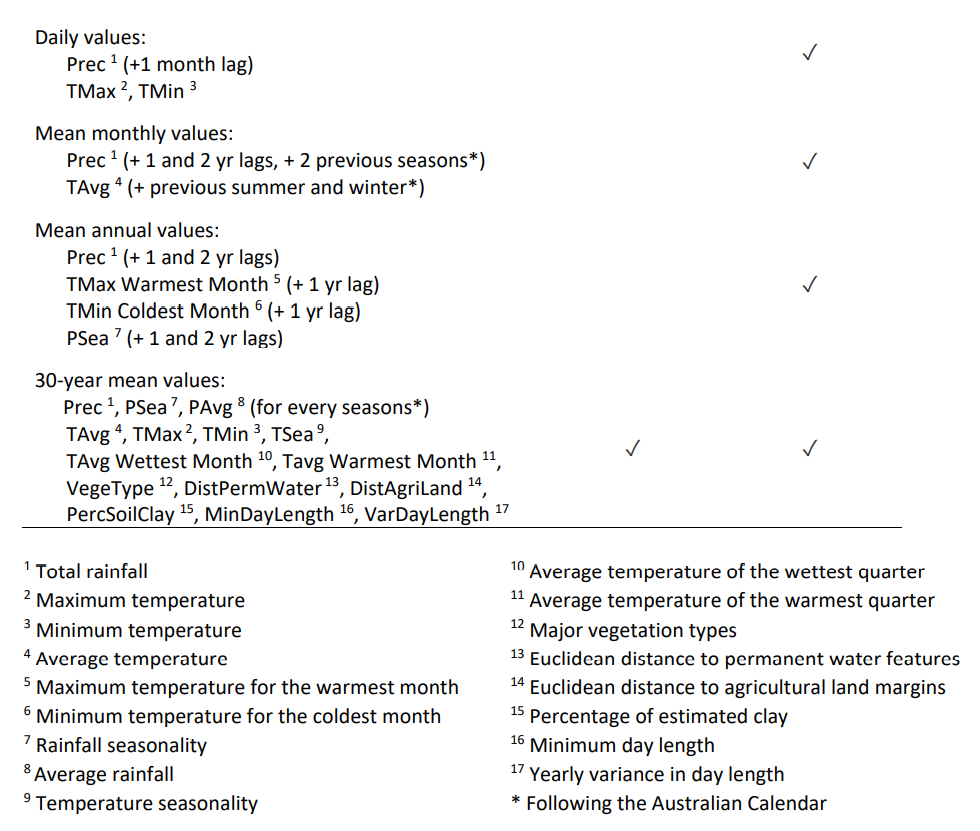

In [90]:
from IPython import display
display.Image("./Weather_features.png")

In [91]:
# Occurence dataset weather features (A_ -> Annual, M_ -> Month, D_ -> Day):
# 'A_Prec_Avg30Yr'       - Total rainfall (unit for precipitation is mm)
# 'A_Psea_Avg30Yr'       - Rainfall seasonality 
# 'A_TAvg_Avg30Yr'       - Avg temperature (unit for temperature is °C)
# 'A_TMax_Avg30Yr'       - Maximum temperature
# 'A_TMin_Avg30Yr'       - Minimum temperature
# 'A_TSea_Avg30Yr'       - Temperature seasonality
# 'A_TWet_Avg30Yr'       - Avg temperature of the wettest quarter
# 'A_TWrm_Avg30Yr'       - Avg temperature of the warmest quarter
# 'A_Prec_AvgAutumn30Yr' - Avg rainfall for Autumn
# 'A_Prec_AvgSummer30Yr' - Avg rainfall for Summer
# 'A_Prec_AvgSpring30Yr' - Avg rainfall for Spring
# 'A_Prec_AvgWinter30Yr' - Avg rainfall for Winter

# Abundance dataset weather features:
# 'D_Prec'                       - Avg Rainfall For the Same Day
# 'D_Prec_30DaysLag'             - Avg Rainfall For 30 Days Before the Sampling Date
# 'M_Prec'                       - Avg Rainfall For the Same Month of the Sampling Date
# 'M_Prec_12PreMonths'           - Avg Rainfall For the Same Month of the Sampling Date (1-year time lag)
# 'M_Prec_24PreMonths'           - Avg Rainfall For the Same Month of the Sampling Date (2-year time lag)
# 'M_Prec_2PresSeasons'          - Avg rainfall of the two previous seasons
# 'A_Prec'                       - Avg rainfall for the same year of the sampling date
# 'A_Prec_1YrLag'                - Avg rainfall for the same year of the sampling date (1-year time lag)
# 'A_Prec_2YrLag'                - Avg rainfall for the same year of the sampling date (2-year time lag)
# 'A_Psea'                       - Seasonal average rainfall for the current year of the data sampling 
# 'A_Psea_1YrLag'                - Seasonal average rainfall for the current year of the data sampling (1-year time lag) 
# 'A_Psea_2YrLag'                - Seasonal average rainfall for the current year of the data sampling (2-year time lag)
# 'D_Tmax'                       - Avg maximum temperature for the same day of the sampling date
# 'D_Tmin'                       - Avg minimum temperature for the same day of the sampling date 
# 'M_TAvg_PreSummer'             - Avg temperature for the previous summer season 
# 'M_TAvg_PreWinter'             - Avg temperature for the previous winter season
# 'A_AvgTMaxWarmestMonth'        - Avg maximum temperature for the warmest month for the same year the samplingdate
# 'A_AvgTMaxWarmestMonth_1YrLag' - Avg maximum temperature for the warmest month for the same year the samplingdate(1-y lag)
# 'A_AvgTMinColdestMonth'        - Avg minimum temperature for the coldest month for the same year the samplingdate 
# 'A_AvgTMinColdestMonth_1YrLag' - Avg minimum temperature for the coldest month for the same year the samplingdate(1-y lag)
# 'A_Prec_Avg30Yr'       - Total rainfall 
# 'A_Psea_Avg30Yr'       - Rainfall seasonality 
# 'A_TAvg_Avg30Yr'       - Average temperature
# 'A_TMax_Avg30Yr'       - Maximum temperature
# 'A_TMin_Avg30Yr'       - Minimum temperature
# 'A_TSea_Avg30Yr'       - Temperature seasonality
# 'A_TWet_Avg30Yr'       - Avg temperature of the wettest quarter
# 'A_TWrm_Avg30Yr'       - Avg temperature of the warmest quarter
# 'A_Prec_AvgAutumn30Yr' - Avg rainfall for Autumn
# 'A_Prec_AvgSummer30Yr' - Avg rainfall for Summer
# 'A_Prec_AvgSpring30Yr' - Avg rainfall for Spring
# 'A_Prec_AvgWinter30Yr' - Avg rainfall for Winter

In [92]:
# This is essentially all the weather data: Daily, Monthly, Seasonal, Annual, 30 years.
# Any other weather features are lagged versions of existing weather features.
# We should focus on the seasonal and annual weather features for our model.

print('                 #   min    max')
print('D_Prec:        ', abundance['D_Prec'].nunique(), abundance['D_Prec'].min(), abundance['D_Prec'].max())
print('M_Prec:        ', abundance['M_Prec'].nunique(), abundance['M_Prec'].min(), abundance['M_Prec'].max())
print('A_Psea:        ', abundance['A_Psea'].nunique(), abundance['A_Psea'].min(), abundance['A_Psea'].max())
print('A_Prec:        ', abundance['A_Prec'].nunique(), abundance['A_Prec'].min(), abundance['A_Prec'].max(),'\n')
print(pd.isna(abundance[['D_Prec']]).value_counts())
print(pd.isna(abundance[['M_Prec']]).value_counts())
print(pd.isna(abundance[['A_Psea']]).value_counts())
print(pd.isna(abundance[['A_Prec']]).value_counts(),'\n')

                 #   min    max
D_Prec:         627 0.0 60.51
M_Prec:         3226 0.0 317.19
A_Psea:         1904 26.07 291.35
A_Prec:         2222 37.6 2606.73 

D_Prec
False     42108
True       9133
dtype: int64
M_Prec
False     43227
True       8014
dtype: int64
A_Psea
False     48687
True       2554
dtype: int64
A_Prec
False     48687
True       2554
dtype: int64 



In [93]:
print('AustraliaState:', abundance['AustraliaState'].nunique())

# As you can see in the results below, the occurence dataset has one benefit over abundance:
# The sightings occur in more areas of Australia! This makes sense since transects are limited.

# The sighting distribution of the occurence dataset (Roy-Dufresne 8) covers more areas in
# Australia compared w/ sighting distribution of the abundance dataset (Roy-Dufresne 11).
# However, we can justify this since the Rabbit population is not evenly distributed across Australia.
# Since there is higher population density in Tasmania, Victoria, and New South Wales, the
# transects should be concentrated in these areas which is the case for the abundance dataset.

print('AustraliaUTMGrid10Km_ID:', abundance['AustraliaUTMGrid10Km_ID'].nunique())
print('AustraliaUTMGrid10Km_ID:', occurence['AustraliaUTMGrid10Km_ID'].nunique(),'\n')

# The amount of unique 30 year values is closely correlated w/ the 
# number of unique 10Km_IDs. Therefore, all weather data is location
# specific and not just the average of the whole continent.

print('ABUNDANCE VS OCCURENCE')
print('                 #   min    max')
print('A_Prec_Avg30Yr:', abundance['A_Prec_Avg30Yr'].nunique(), abundance['A_Prec_Avg30Yr'].min(), abundance['A_Prec_Avg30Yr'].max())
print('A_Prec_Avg30Yr:', occurence['A_Prec_Avg30Yr'].nunique(), occurence['A_Prec_Avg30Yr'].min(), occurence['A_Prec_Avg30Yr'].max(),'\n')

print(pd.isna(abundance[['A_Prec_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_Prec_Avg30Yr']]).value_counts())

AustraliaState: 8
AustraliaUTMGrid10Km_ID: 302
AustraliaUTMGrid10Km_ID: 9839 

ABUNDANCE VS OCCURENCE
                 #   min    max
A_Prec_Avg30Yr: 299 154.48 1821.8
A_Prec_Avg30Yr: 8895 135.51 3270.03 

A_Prec_Avg30Yr
False             48687
True               2554
dtype: int64
A_Prec_Avg30Yr
False             649970
True               39295
dtype: int64


In [94]:
# As you can see below, the same Km_ID appears to give the same Avg30Yr values
abundance[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']]

,AustraliaUTMGrid10Km_ID,A_Prec_Avg30Yr,A_Psea_Avg30Yr,A_TMax_Avg30Yr,A_TSea_Avg30Yr
0,55H0894,747.47,15.05,26.78,524.14
1,55H0412,654.82,14.26,31.44,572.24
2,56J3074,702.37,39.88,31.34,534.54
3,56J3074,702.37,39.88,31.34,534.54
4,56J1025,637.21,40.32,32.41,490.85
...,...,...,...,...,...
51236,54J4747,336.46,23.85,30.83,570.48
51237,54J4747,336.46,23.85,30.83,570.48
51238,54J4747,336.46,23.85,30.83,570.48
51239,54J4747,336.46,23.85,30.83,570.48


In [95]:
# Our hypothesis is validated below
print(abundance[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']].nunique())

AustraliaUTMGrid10Km_ID    302
A_Prec_Avg30Yr             299
A_Psea_Avg30Yr             289
A_TMax_Avg30Yr             268
A_TSea_Avg30Yr             299
dtype: int64


In [96]:
# Pick a single Km_ID. Even though there are many rows, it only has one coresponding weather value per feature
proof_of_30yr_kmid=abundance[abundance['AustraliaUTMGrid10Km_ID']=='54J4747']
proof_of_30yr_kmid[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']].nunique()

AustraliaUTMGrid10Km_ID    1
A_Prec_Avg30Yr             1
A_Psea_Avg30Yr             1
A_TMax_Avg30Yr             1
A_TSea_Avg30Yr             1
dtype: int64

In [97]:
# For our model, we want to predict the future rabbit sightings for the next yer per season.
# Knowing the average from the past 30 years DOES NOT help the model.
# Even though data exploration should be limited to the features below,
# its a good idea to do some data exploration on the 30 year values on the transects.
# Gives us a general idea on the weather conditions in such areas.


# Here are the useful weather features:
# 'M_TAvg_PreSummer'             - Avg temperature for the previous summer season 
# 'M_TAvg_PreWinter'             - Avg temperature for the previous winter season
# 'M_Prec_2PresSeasons'          - Avg rainfall of the two previous seasons
# 'A_Prec'                       - Avg rainfall for the same year of the sampling date
# 'A_Prec_1YrLag'                - Avg rainfall for the same year of the sampling date (1-year time lag)
# 'A_Prec_2YrLag'                - Avg rainfall for the same year of the sampling date (2-year time lag)
# 'A_Psea'                       - Seasonal average rainfall for the current year of the data sampling 
# 'A_Psea_1YrLag'                - Seasonal average rainfall for the current year of the data sampling (1-year time lag) 
# 'A_Psea_2YrLag'                - Seasonal average rainfall for the current year of the data sampling (2-year time lag)

# However, the paper cites that there are decent correlations between weather and rabbit sightings.
# Alrady knowing the weather at the particular season we are trying to predict already gives
# a glimpse into the 'season_population' feature we're trying to predict. It's time traveling.
# Therefore, we limit our weather features to: 
# 'M_TAvg_PreSummer'             - Avg temperature for the previous summer season 
# 'M_TAvg_PreWinter'             - Avg temperature for the previous winter season
# 'M_Prec_2PresSeasons'          - Avg rainfall of the two previous seasons
# 'A_Prec_1YrLag'                - Avg rainfall for the same year of the sampling date (1-year time lag)
# 'A_Prec_2YrLag'                - Avg rainfall for the same year of the sampling date (2-year time lag) 
# 'A_Psea_1YrLag'                - Seasonal average rainfall for the current year of the data sampling (1-year time lag) 
# 'A_Psea_2YrLag'                - Seasonal average rainfall for the current year of the data sampling (2-year time lag)

# The non-weather features that are important is as follows: 
# 'Year'
# 'Season'
# 'AustraliaUTMGrid10Km_ID'
# 'Transect_ID'
# 'TransectWidth' 
# 'TransectLength' 
# 'VegeType' 
# 'DistPermWater' 
# 'DistAgriLand' 
# 'PercSoilClay'

# And, of course, our target:
# 'RabbitsPerKm'

# However, we will need to transform this feature to represent
# the total rabbit sightings for the entire season rather than
# at that particular night. Then, the feature will be renamed to:
# 'season_population'. Lets also lag this feature to be t-1 and
# t-2.

# Later on in this project, we can do multivariate forecasting and
# try to forecast 'A_Prec' and 'A_Psea' but I won't get ahead of
# myself.

# Given that the abundance data occurs from 1965 to 2015 (Roy-Dufresne 8),
# this is a total of 50 years. Since there are 4 seasons in a year and 
# 308 transects, our final dataset should have a total of approximately:
# 61,600 rows.


uni_population_growth=abundance[['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID','TransectWidth',
                           'TransectLength','VegeType','DistPermWater','DistAgriLand','PercSoilClay',
                           'M_TAvg_PreSummer','M_TAvg_PreWinter','M_Prec_2PresSeasons','A_Prec_1YrLag','A_Prec_2YrLag',
                           'A_Psea_1YrLag','A_Psea_2YrLag','RabbitsPerKm']]
uni_population_growth

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,TransectWidth,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,RabbitsPerKm
0,1995.0,NaN,55H0894,I1,100.0,NaN,11,0.44,1.61,15.83,NaN,NaN,NaN,570.77,784.78,72.63,54.21,32.000
1,1995.0,NaN,55H0412,I5,100.0,NaN,12,1.19,2.23,18.05,NaN,NaN,NaN,441.97,670.48,82.96,60.02,2.200
2,1995.0,NaN,56J3074,B37,100.0,NaN,11,0.85,3.08,22.72,NaN,NaN,NaN,484.33,530.73,82.05,66.32,13.300
3,1995.0,NaN,56J3074,B37,100.0,NaN,11,0.85,3.08,22.72,NaN,NaN,NaN,484.33,530.73,82.05,66.32,7.800
4,1995.0,NaN,56J1025,B39,100.0,NaN,11,2.02,16.28,42.96,NaN,NaN,NaN,352.58,434.37,110.20,83.93,4.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51236,2002.0,3.0,54J4747,3Creeks,100.0,2.3,4,4.52,14.11,28.91,22.153,9.148,8.264,368.47,426.79,81.25,58.10,2.174
51237,2002.0,3.0,54J4747,3Creeks,100.0,5.6,4,4.52,14.11,28.91,22.153,9.148,8.264,368.47,426.79,81.25,58.10,6.786
51238,2002.0,4.0,54J4747,3Creeks,100.0,22.3,4,4.52,14.11,28.91,21.419,11.491,22.571,368.47,426.79,81.25,58.10,1.659
51239,2002.0,4.0,54J4747,3Creeks,100.0,0.5,4,4.52,14.11,28.91,21.419,11.491,22.571,368.47,426.79,81.25,58.10,6.000


In [98]:
# When trying to look for NaN values, better to start looking at the most important features
# If there is missing data in these important features, the only solution is to remove the rows.

print(pd.isna(uni_population_growth[['Year']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Season']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Transect_ID']]).value_counts(),'\n')

Year 
False    51214
True        27
dtype: int64 

Season
False     45754
True       5487
dtype: int64 

AustraliaUTMGrid10Km_ID
False                      51241
dtype: int64 

Transect_ID
False          45860
True            5381
dtype: int64 



In [99]:
# Remove all NaNs from 'Season'
uni_population_growth=uni_population_growth[uni_population_growth['Season'].notna()]

In [100]:
print(pd.isna(uni_population_growth[['Year']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Season']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Transect_ID']]).value_counts(),'\n')

Year 
False    45754
dtype: int64 

Season
False     45754
dtype: int64 

AustraliaUTMGrid10Km_ID
False                      45754
dtype: int64 

Transect_ID
False          40415
True            5339
dtype: int64 



In [101]:
# Thought the nans from 'Season' would overlap w/ nans from Transect_ID
# That is not the case so remove all nan Transect_IDs.
uni_population_growth=uni_population_growth[uni_population_growth['Transect_ID'].notna()]

In [102]:
# All important feature no longer have nans, great.
print(pd.isna(uni_population_growth[['Year']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Season']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Transect_ID']]).value_counts(),'\n')

Year 
False    40415
dtype: int64 

Season
False     40415
dtype: int64 

AustraliaUTMGrid10Km_ID
False                      40415
dtype: int64 

Transect_ID
False          40415
dtype: int64 



In [103]:
# The other features can have the nans plugged in w/ zeroes
# so long as not too many nans. Lets see how many nans.
print(pd.isna(uni_population_growth[['TransectWidth']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['TransectLength']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['VegeType']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['DistPermWater']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['DistAgriLand']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['PercSoilClay']]).value_counts(),'\n')

print(pd.isna(uni_population_growth[['M_TAvg_PreSummer']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['M_TAvg_PreWinter']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['M_Prec_2PresSeasons']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Prec_1YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Prec_2YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Psea_1YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Psea_2YrLag']]).value_counts(),'\n')

print(pd.isna(uni_population_growth[['RabbitsPerKm']]).value_counts(),'\n')

TransectWidth
False            30761
True              9654
dtype: int64 

TransectLength
False             40373
True                 42
dtype: int64 

VegeType
False       40415
dtype: int64 

DistPermWater
False            40415
dtype: int64 

DistAgriLand
False           40415
dtype: int64 

PercSoilClay
False           40415
dtype: int64 

M_TAvg_PreSummer
False               37998
True                 2417
dtype: int64 

M_TAvg_PreWinter
False               38004
True                 2411
dtype: int64 

M_Prec_2PresSeasons
False                  38070
True                    2345
dtype: int64 

A_Prec_1YrLag
False            38096
True              2319
dtype: int64 

A_Prec_2YrLag
False            38096
True              2319
dtype: int64 

A_Psea_1YrLag
False            38096
True              2319
dtype: int64 

A_Psea_2YrLag
False            38096
True              2319
dtype: int64 

RabbitsPerKm
False           40370
True               45
dtype: int64 



In [104]:
# Almost a quarter of entries in 'TransectWidth' are nans. Too many. Remove this feature.
uni_population_growth=uni_population_growth.drop(columns=['TransectWidth'])
print(uni_population_growth.shape[1])

# Nearly all of the weather features have the same number of nans missing: 2417.
# Removing the nans from one weather feature should fix the rest.
uni_population_growth=uni_population_growth[uni_population_growth['M_TAvg_PreSummer'].notna()]

# The average transect length is 10 km (Roy-Dufresne 8), fill the nans with that value.
# Remove the nans values of RabbitsPerKM since important feature.
uni_population_growth['TransectLength']=uni_population_growth['TransectLength'].fillna(10)
uni_population_growth=uni_population_growth[uni_population_growth['RabbitsPerKm'].notna()]

17


In [105]:
# All is well... except for one feature. Quickly fix
print(pd.isna(uni_population_growth[['M_TAvg_PreWinter']]).value_counts(),'\n\n')
uni_population_growth=uni_population_growth[uni_population_growth['M_TAvg_PreWinter'].notna()]

print(pd.isna(uni_population_growth[['TransectLength']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['VegeType']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['DistPermWater']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['DistAgriLand']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['PercSoilClay']]).value_counts(),'\n')

print(pd.isna(uni_population_growth[['M_TAvg_PreSummer']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['M_TAvg_PreWinter']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['M_Prec_2PresSeasons']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Prec_1YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Prec_2YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Psea_1YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Psea_2YrLag']]).value_counts(),'\n')

print(pd.isna(uni_population_growth[['RabbitsPerKm']]).value_counts(),'\n')

M_TAvg_PreWinter
False               37955
True                    6
dtype: int64 


TransectLength
False             37955
dtype: int64 

VegeType
False       37955
dtype: int64 

DistPermWater
False            37955
dtype: int64 

DistAgriLand
False           37955
dtype: int64 

PercSoilClay
False           37955
dtype: int64 

M_TAvg_PreSummer
False               37955
dtype: int64 

M_TAvg_PreWinter
False               37955
dtype: int64 

M_Prec_2PresSeasons
False                  37955
dtype: int64 

A_Prec_1YrLag
False            37955
dtype: int64 

A_Prec_2YrLag
False            37955
dtype: int64 

A_Psea_1YrLag
False            37955
dtype: int64 

A_Psea_2YrLag
False            37955
dtype: int64 

RabbitsPerKm
False           37955
dtype: int64 



In [106]:
# Categorical features like 'Vegetype' and 'Season' should be one-hot-encoded.

# ...
# Factor level: 1 (Summer: Jan, Feb, Mar), 
#               2 (Autumn: Apr, May, Jun), 
#               3 (Winter: Jul, Aug, Sep), 
#               4 (Spring: Oct, Nov, Dec)
# (Roy-Dufresne 41)...

# Ok, that's awful.
# Lets classify the seasons based off of the American Calendar:
# Factor level: 1 (Winter: Jan, Feb, Mar), 
#               2 (Spring: Apr, May, Jun), 
#               3 (Summer: Jul, Aug, Sep), 
#               4 (Autumn: Oct, Nov, Dec)
print(uni_population_growth['Season'].unique())

# ...
# We re-classified the VegeType variable into 13 categories:
# 1 (rainforest and vine thicket)
#      2 (eucalyptus forest)
#      3 (eucalyptus woodland)
#      4 (other woodlands)
# 5 (inundated swamps, salt marshes, other grasslands)
# 6 (low-closed forests and tall closed shrublands)
#      7 (shrublands)
#      8 (tussock grasslands)
#      9 (hummock grasslands)
#     10 (shrublands)
#     11 (inland aquatic, water, lakes, lagoons)
# 12 (cleared vegetation, buildings, rocks, bare areas)
# 13 (unclassified and unknown features)
print(uni_population_growth['VegeType'].unique())

[2. 3. 4. 1.]
[ 8 11  2  3  7  9 10  4]


In [107]:
# Now we have to replace 'RabbitsPerKm' w/ the 'season_population' feature
# and add it's lagged versions.

# 'RabbitsPerKm' - daily
# 'season_population' - season in a year

# The goal here is to calculate the total rabbit population per year-season-grid-transect.
# To get this, we use the following formula: SUM([RabbitsPerKm_1 * TransectLength_1], ... , [RabbitsPerKm_N * TransectLength_N])
# For the summation, the records where grouped by 'Year','Season','AustraliaUTMGrid10Km_ID', and 'Transect_ID'

uni_population_growth['number_sightings'] = uni_population_growth['RabbitsPerKm']*uni_population_growth['TransectLength']
uni_population_growth['season_population'] = uni_population_growth.groupby(['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID'])['number_sightings'].transform(np.sum)
del uni_population_growth['RabbitsPerKm']
del uni_population_growth['number_sightings']
# Alter this line below Nahin.
uni_population_growth.drop_duplicates(inplace=True)
uni_population_growth.sort_values(['Year','Season','Transect_ID'])

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
9344,1971.0,2.0,54H0128,C1,8.0,4,5.35,35.73,27.60,23.374,9.123,59.522,338.82,338.82,70.66,70.66,55.000
9345,1971.0,2.0,54H0128,C1,8.0,4,5.35,35.73,27.60,23.374,9.123,32.976,338.82,338.82,70.66,70.66,55.000
9346,1971.0,2.0,54H0128,C1,8.0,4,5.35,35.73,27.60,23.143,8.938,4.277,338.82,338.82,70.66,70.66,55.000
12237,1971.0,2.0,54H0071,C1,8.0,10,2.82,55.88,30.00,23.374,9.123,59.522,306.50,306.50,82.87,82.87,36.000
12239,1971.0,2.0,54H0071,C1,8.0,10,2.82,55.88,30.00,23.374,9.123,32.976,306.50,306.50,82.87,82.87,36.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42662,2012.0,4.0,54H1351,HwyNth,27.0,4,4.72,6.25,22.26,23.590,10.141,12.161,475.42,502.54,93.06,79.10,0.999
42788,2012.0,4.0,54H1351,Taparoo,30.0,4,4.72,6.25,22.26,23.590,10.141,12.161,475.42,502.54,93.06,79.10,8.010
43241,2012.0,4.0,54H2021,Timberoo,16.0,11,2.51,1.08,8.66,23.590,10.141,12.161,441.44,482.26,84.89,73.28,28.013
43242,2012.0,4.0,54H2021,Timberoo,17.0,11,2.51,1.08,8.66,23.590,10.141,12.161,441.44,482.26,84.89,73.28,28.013


In [108]:
# The dataset is as expected. I didn't accidently manipulate the weather features. 
# There is different weather data for the same location in the same time.
result= abundance[(abundance['Year'] == 1971) & \
                  (abundance['Season'] == 2.0) & \
                  (abundance['AustraliaUTMGrid10Km_ID'] == '54H0128') & \
                  (abundance['Transect_ID'] == 'C1')]

result[['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID','TransectWidth',
                           'TransectLength','VegeType','DistPermWater','DistAgriLand','PercSoilClay',
                           'M_TAvg_PreSummer','M_TAvg_PreWinter','M_Prec_2PresSeasons','A_Prec_1YrLag','A_Prec_2YrLag',
                           'A_Psea_1YrLag','A_Psea_2YrLag','RabbitsPerKm']]

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,TransectWidth,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,RabbitsPerKm
9344,1971.0,2.0,54H0128,C1,100.0,8.0,4,5.35,35.73,27.6,23.374,9.123,59.522,338.82,338.82,70.66,70.66,1.875
9345,1971.0,2.0,54H0128,C1,100.0,8.0,4,5.35,35.73,27.6,23.374,9.123,32.976,338.82,338.82,70.66,70.66,2.500
9346,1971.0,2.0,54H0128,C1,100.0,8.0,4,5.35,35.73,27.6,23.143,8.938,4.277,338.82,338.82,70.66,70.66,2.500


In [109]:
# There are a lot of duplicates b/c of weather features and such.
uni_population_growth[['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID']].duplicated().sum()

3231

In [110]:
# You can make lagged features using pd.shift

In [111]:
# Here is the minimum and maximum value of the season population for the whole column
print(uni_population_growth.season_population.min(), ',',  uni_population_growth.season_population.max())

0.0 , 1787.994


In [112]:
uni_population_growth=pd.get_dummies(uni_population_growth, columns=['Season','VegeType'])
uni_population_growth.columns

Index(['Year', 'AustraliaUTMGrid10Km_ID', 'Transect_ID', 'TransectLength',
       'DistPermWater', 'DistAgriLand', 'PercSoilClay', 'M_TAvg_PreSummer',
       'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
       'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag', 'season_population',
       'Season_1.0', 'Season_2.0', 'Season_3.0', 'Season_4.0', 'VegeType_2',
       'VegeType_3', 'VegeType_4', 'VegeType_7', 'VegeType_8', 'VegeType_9',
       'VegeType_10', 'VegeType_11'],
      dtype='object')

In [113]:
# Rename columns to be legible
uni_population_growth = uni_population_growth.rename(columns={'Season_1.0': 'Season_Winter', 
                                                              'Season_2.0': 'Season_Spring',
                                                              'Season_3.0': 'Season_Summer',
                                                              'Season_4.0': 'Season_Autumn',
                                                              'VegeType_2': 'VegeType_Forest',
                                                              'VegeType_3': 'VegeType_Woodland',
                                                              'VegeType_4': 'VegeType_Other_Woodland',
                                                              'VegeType_7': 'VegeType_Shrublands',
                                                              'VegeType_8': 'VegeType_Tussock_Grasslands',
                                                              'VegeType_9': 'VegeType_Hummock_Grasslands',
                                                              'VegeType_10': 'VegeType_Shrublands',
                                                              'VegeType_11': 'VegeType_Aquatic'})

In [114]:
# Much better to read
uni_population_growth.columns

Index(['Year', 'AustraliaUTMGrid10Km_ID', 'Transect_ID', 'TransectLength',
       'DistPermWater', 'DistAgriLand', 'PercSoilClay', 'M_TAvg_PreSummer',
       'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
       'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag', 'season_population',
       'Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Autumn',
       'VegeType_Forest', 'VegeType_Woodland', 'VegeType_Other_Woodland',
       'VegeType_Shrublands', 'VegeType_Tussock_Grasslands',
       'VegeType_Hummock_Grasslands', 'VegeType_Shrublands',
       'VegeType_Aquatic'],
      dtype='object')

In [115]:
#statistics of the dataframe
uni_population_growth.describe()

,Year,TransectLength,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,...,Season_Summer,Season_Autumn,VegeType_Forest,VegeType_Woodland,VegeType_Other_Woodland,VegeType_Shrublands,VegeType_Tussock_Grasslands,VegeType_Hummock_Grasslands,VegeType_Shrublands,VegeType_Aquatic
count,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.00000,...,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000,18704.000000
mean,2001.430229,3.045111,3.689426,37.044100,19.026675,21.190403,9.270944,41.534021,507.749638,491.48296,...,0.190975,0.276091,0.090729,0.054748,0.039778,0.056405,0.006576,0.008073,0.032346,0.711345
std,7.790680,10.231073,5.847527,129.402735,7.613292,2.779655,2.172609,26.680588,214.524871,205.16152,...,0.393080,0.447074,0.287231,0.227493,0.195441,0.230708,0.080828,0.089490,0.176922,0.453149
min,1971.000000,0.100000,0.050000,0.190000,5.000000,13.897000,2.546000,0.000000,73.680000,73.68000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,0.500000,0.290000,0.700000,14.910000,19.400000,8.305000,22.749000,341.730000,332.64000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2001.000000,0.500000,1.120000,2.240000,17.220000,20.709000,9.122000,38.058000,486.820000,472.26000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2008.000000,2.000000,5.210000,9.960000,24.420000,22.933000,10.435000,56.910000,630.010000,609.54000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2012.000000,100.000000,52.940000,716.450000,47.190000,31.029000,16.571000,177.821000,1232.150000,1232.15000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
# What can we do w/ the occurence dataset?
# 90% of the rows in occurence dataset happen warren locations.
# warren is a series of tunnels. Slice occurence for only warren sightings
# How has the population increased in these rabbit homes?

# What does QA features mean?

# Univariate

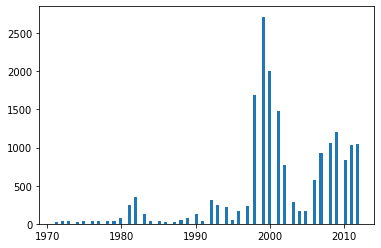

In [117]:
plt.hist(uni_population_growth['Year'], bins=100);

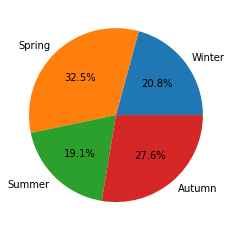

In [118]:
all_seasons = ('Winter', 'Spring', 'Summer','Autumn')
season_counts = (uni_population_growth[uni_population_growth['Season_Winter']==1].shape[0],
                 uni_population_growth[uni_population_growth['Season_Spring']==1].shape[0],
                 uni_population_growth[uni_population_growth['Season_Summer']==1].shape[0],
                 uni_population_growth[uni_population_growth['Season_Autumn']==1].shape[0])
plt.pie(
season_counts,
labels=all_seasons,
autopct='%1.1f%%',
)
plt.show()

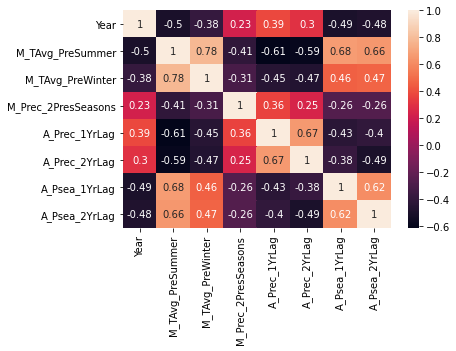

In [119]:
import seaborn as sns
sns.heatmap(uni_population_growth[['Year', 'M_TAvg_PreSummer', 'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
                                   'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag']].corr(),annot=True)